In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('FINAL_data.csv')
df.head()

,price,metro_time,info_total_area,floor_ratio,firt_floor,last_floor,rooms_1,rooms_2,rooms_3,rooms_4,...,rent_living_conditions_можно с детьми и животными,rent_living_conditions_можно с животными,"rent_living_conditions_ни с детьми, ни с животными",year_built_interval_1890-1917,year_built_interval_1917-1945,year_built_interval_1945-1970,year_built_interval_1970-1990,year_built_interval_1991-2025,year_built_interval_не попал,log_distance
0,470000,7.0,73.0,0.683333,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1.291674
1,270000,13.0,68.0,0.522727,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1.291674
2,30000,9.0,40.0,0.333333,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,2.921454
3,75000,13.0,60.0,0.375000,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1.742368
4,29000,7.0,12.0,0.611111,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1.466229


In [8]:
df.columns.values

array(['price', 'metro_time', 'info_total_area', 'floor_ratio',
       'firt_floor', 'last_floor', 'rooms_1', 'rooms_2', 'rooms_3',
       'rooms_4', 'rooms_студия', 'rent_jkh_включена (без счётчиков)',
       'rent_jkh_включена (счётчики включены)', 'rent_prepayment_1 месяц',
       'rent_prepayment_2 месяца', 'rent_prepayment_3 месяца',
       'rent_term_несколько месяцев', 'rent_term_от года',
       'rent_living_conditions_можно с детьми',
       'rent_living_conditions_можно с детьми и животными',
       'rent_living_conditions_можно с животными',
       'rent_living_conditions_ни с детьми, ни с животными',
       'year_built_interval_1890-1917', 'year_built_interval_1917-1945',
       'year_built_interval_1945-1970', 'year_built_interval_1970-1990',
       'year_built_interval_1991-2025', 'year_built_interval_не попал',
       'log_distance'], dtype=object)

In [9]:
df['price'] = np.log(df['price'])

df.rename(columns={'price': 'log_price'}, inplace=True)
df.head()

,log_price,metro_time,info_total_area,floor_ratio,firt_floor,last_floor,rooms_1,rooms_2,rooms_3,rooms_4,...,rent_living_conditions_можно с детьми и животными,rent_living_conditions_можно с животными,"rent_living_conditions_ни с детьми, ни с животными",year_built_interval_1890-1917,year_built_interval_1917-1945,year_built_interval_1945-1970,year_built_interval_1970-1990,year_built_interval_1991-2025,year_built_interval_не попал,log_distance
0,13.060488,7.0,73.0,0.683333,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1.291674
1,12.506177,13.0,68.0,0.522727,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1.291674
2,10.308953,9.0,40.0,0.333333,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,2.921454
3,11.225243,13.0,60.0,0.375000,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1.742368
4,10.275051,7.0,12.0,0.611111,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1.466229


In [17]:
import statsmodels.api as sm

y = df['log_price']
X = df.drop(columns=['log_price']) # уже с const

ols_model = sm.OLS(y, X).fit()
weights = 1 / (ols_model.resid ** 2 + 1e-6)

wls_model = sm.WLS(y, X, weights=weights).fit()

residuals = wls_model.resid
sigma_sq = residuals**2

weights = 1 / sigma_sq

wls_results = sm.WLS(y, X, weights=weights).fit()

print(wls_results.summary())

                            WLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.359e+06
Date:                Sat, 12 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:46:08   Log-Likelihood:                 1117.2
No. Observations:                1326   AIC:                            -2188.
Df Residuals:                    1303   BIC:                            -2069.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [18]:
print(wls_model.summary().tables[1])  # Стандартные ошибки без коррекции

                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
metro_time                                            -0.0027      0.000    -13.744      0.000      -0.003      -0.002
info_total_area                                        0.0119      0.000    103.448      0.000       0.012       0.012
floor_ratio                                            0.0312      0.003     12.205      0.000       0.026       0.036
firt_floor                                            -0.0715      0.002    -28.760      0.000      -0.076      -0.067
last_floor                                            -0.0380      0.005     -7.782      0.000      -0.048      -0.028
rooms_1                                                1.0543      0.006    182.190      0.000       1.043       1.066
rooms_2                                         

In [21]:
print("Результаты с робастными стандартными ошибками с поправкой Уайта:")
robust_results = wls_results.get_robustcov_results(cov_type='HC3')
print(robust_results.summary().tables[1])

Результаты с робастными стандартными ошибками с поправкой Уайта:
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
metro_time                                            -0.0027      0.000    -10.220      0.000      -0.003      -0.002
info_total_area                                        0.0118      0.000     82.861      0.000       0.011       0.012
floor_ratio                                            0.0319      0.003     12.546      0.000       0.027       0.037
firt_floor                                            -0.0729      0.004    -17.163      0.000      -0.081      -0.065
last_floor                                            -0.0355      0.006     -6.280      0.000      -0.047      -0.024
rooms_1                                                1.0543      0.012     91.156      0.000       1

Среднее остатков: 0.0008
t-статистика: 0.1179, p-значение: 0.9062
Доверительный интервал для E(e_i):
[-0.0122, 0.0138]
Среднее остатков: 0.0008


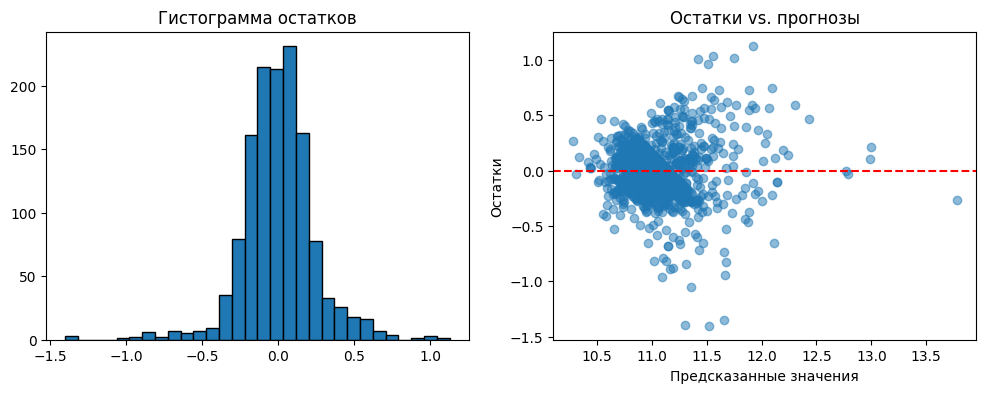

In [27]:
from scipy import stats

wls_residuals = wls_model.resid

residual_mean = np.mean(wls_residuals)
t_test = stats.ttest_1samp(wls_residuals, 0)
print(f"Среднее остатков: {residual_mean:.4f}")
print(f"t-статистика: {t_test.statistic:.4f}, p-значение: {t_test.pvalue:.4f}")

n = len(wls_residuals)
alpha = 0.05
mean_e = np.mean(wls_residuals)
se_e = np.std(wls_residuals, ddof=1) / np.sqrt(n)

t_crit = stats.t.ppf(1 - alpha/2, df=n-1)

# Доверительный интервал
ci_lower = mean_e - t_crit * se_e
ci_upper = mean_e + t_crit * se_e

print(
    f"Доверительный интервал для E(e_i):\n"
    f"[{ci_lower:.4f}, {ci_upper:.4f}]\n"
    f"Среднее остатков: {mean_e:.4f}"
)

# остаткои
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(wls_residuals, bins=30, edgecolor='k')
plt.title("Гистограмма остатков")

plt.subplot(1, 2, 2)
plt.scatter(wls_results.fittedvalues, wls_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("Остатки vs. прогнозы")
plt.show()